## Import the required libraries

In [35]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [36]:
#this function is going to be helpful in question 11 to compute the test error rate
#this is counting the amount of values outside a specific range and dividing it over the length of the data
def test_error_rate(y_test,prediction):
    error = 0
    test_error = 0
    for index in range(len(y_test)):
        if y_test[index] < prediction[index][1] and y_test[index] > prediction[index][0]:
            continue
        else:
            error += 1
    return error/ len(y_test)

## 1) load the data

In [37]:
diabetes = datasets.load_diabetes()

## 2) split the data into training and testing

In [38]:
X_data = diabetes.data
y = diabetes.target
X_train,X_test,y_train,y_test = train_test_split(X_data,y,random_state = 408)

## 3) training and testing R squared and the number of features

In [39]:
#creating the classifier
clf = linear_model.Lasso()

#fitting the data ( training the model )
clf.fit(X_train,y_train)

#predicting on the training and testing sets
predict_training =clf.predict(X_train)
predict_testing = clf.predict(X_test)

#calculating r score for training and testing
r2_score_for_training = r2_score(y_train, predict_training)
r2_score_for_testing = r2_score(y_test, predict_testing)

print("the r squared score for training is:",r2_score_for_training)
print("the r squared score for testing is:",r2_score_for_testing)

#as we can see this model is using 3 features to predict the model and ignoring the others
#when we run this print, it will produce 10 values of which 3 are non-zero so we can see this model uses only 3 features
print(clf.coef_)

#using clf.coef_ to calculate how many feature are non zero
features_used = []
for i in range(0,len(clf.coef_)):
    if clf.coef_[i] != 0:
        features_used.append(diabetes['feature_names'][i])
        
print("the number of features used is:",len(features_used))
print("the features used in order to predict this dataset are:",features_used)        

the r squared score for training is: 0.36859375515801496
the r squared score for testing is: 0.3403312415954568
[  0.           0.         347.65886726 127.46177627   0.
   0.          -0.           0.         233.92769906   0.        ]
the number of features used is: 3
the features used in order to predict this dataset are: ['bmi', 'bp', 's5']


## 4) importing data from the file instead

In [40]:
#the data are saved in a txt file that is why I have used the csv.reader then produce a list out of those data
import csv
with open('C:/Users/kali/Desktop/Tab-delimited diabetes data.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

In [41]:
#I have divided the data into features, labels and data to predict add the data that i need
features = []
data = []
label = []

for i in range(0,len(d)):
    array_of_data = []
    if i == 0:
        features.append(d[i])
    else:
        for j in range(0,len(d[0])):
            if j != len(d[0]) - 1:
                array_of_data.append(d[i][j])
            else:
                label.append(d[i][j])
        data.append(array_of_data)        
features = np.array(features[0])
label = np.array(label)
data = np.array(data)

## 5) splitting these data into training and testing

In [42]:
X_train,X_test,y_train,y_test = train_test_split(data,label,random_state=408)

In [43]:
#using the standardscaler function to Scale the data then fitting them using training set
scaler = StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

#this is important because the data have different types ( some are int some are float )
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

## 6) Repeating 3 with the new data

in here the rsquared for both training and testing is higher than the first one and this is due to taking more features into consideration where in the first one the classifier took 3 features to compute the rsquared but in here it took 8 features ( the more features we take the higher the r squared)

In [44]:
clf.fit(X_train,y_train)
predicting_new_training = clf.predict(X_train)
predicting_new_testing = clf.predict(X_test)
new_r2_score_for_training = r2_score(y_train,predicting_new_training)
new_r2_score_for_testing = r2_score(y_test,predicting_new_testing)
print("the r squared score for the new data training is:",new_r2_score_for_training)
print("the r squared score for the new data tresting is:",new_r2_score_for_testing)

features_used = []
for i in range(0,len(clf.coef_)):
    if clf.coef_[i] != 0:
        features_used.append(diabetes['feature_names'][i])
print("the number of features used is:",len(features_used))
print("the features used in order to predict this dataset are:",features_used)        

the r squared score for the new data training is: 0.5219263505249627
the r squared score for the new data tresting is: 0.4364337921284196
the number of features used is: 8
the features used in order to predict this dataset are: ['sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']


## 7) preprocess data using StandardScaler

In [45]:
#in here, I have preprocessed the data but I used the variables created before 
scaler = StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

## 8) Repeat the process using the new StandardScaler data

as we can see in here, the training and testing r squared are close to the ones in question 6 and not in question 3. we would expect the model to produce similar result to 6 and 3 but the thing is, in here we are taking 1 more feature than question 6 and 5 more than 3, this will result in a bit higher r squared than question 6 which is confirmed and much higher than question 3 which is also confirmed.

In [46]:
clf.fit(X_train_scaler,y_train)
prediction_for_training = clf.predict(X_train_scaler)
prediction_for_testing = clf.predict(X_test_scaler)
r2_score_for_scaler_training = r2_score(y_train,prediction_for_training)
r2_score_for_scaler_testing = r2_score(y_test,prediction_for_testing)
print("rsquared for training scalar prediction is:",r2_score_for_scaler_training)
print("rsquared for testing scalar prediction is:",r2_score_for_scaler_testing)

features_used = []
for i in range(0,len(clf.coef_)):
    if clf.coef_[i] != 0:
        features_used.append(diabetes['feature_names'][i])
print("the number of features used is:",len(features_used))
print("the features used in order to predict this dataset are:",features_used)        

rsquared for training scalar prediction is: 0.5253295326189974
rsquared for testing scalar prediction is: 0.45579992198161157
the number of features used is: 7
the features used in order to predict this dataset are: ['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']


## 9) varying alpha values

In [47]:
#I have created this code which will take different values of values and for each one i have trained my new model based on it
alpha = list(np.arange(0.01,40,0.01))
alpha_used = []
number_of_features_used = []
r_squared_used = []

for i in alpha:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(X_train_scaler,y_train)
    predict_testing = clf.predict(X_test_scaler)
    r2 = r2_score(y_test, predict_testing)
    alpha_used.append(i)
    number_of_features_used.append(np.count_nonzero(clf.coef_))
    r_squared_used.append(r2)

In [48]:
#I have created a dataframe which will take have later three values the number of features, alpha used for each one and the r squared calculated for it
df = pd.DataFrame(columns=['number of features used', 'r squared', 'alpha used'])

In [49]:
#this is used to fit the 3 columns data into the dataframe using .loc
for i in range(0,len(alpha_used)):
    df.loc[i] = number_of_features_used[i],r_squared_used[i],alpha_used[i]

In [50]:
#i have used grouby and idmax to get the maximum value of rsquared of each feature used and getting the alpha for it 
df = df.loc[df.groupby('number of features used')['r squared'].idxmax()]

In [51]:
df

,number of features used,r squared,alpha used
3172,2.0,0.210795,31.73
1593,3.0,0.381859,15.94
567,4.0,0.432062,5.68
359,5.0,0.447246,3.60
261,6.0,0.452265,2.62
118,7.0,0.455851,1.19
64,8.0,0.455641,0.65
10,9.0,0.456753,0.11
0,10.0,0.458532,0.01


looking at the graph, i would take 7 features where it gave me 0.455851 rsquared. the reason for this is that there isn't much difference between 7 to 10 features and 6 and 7 are similar with 7 being a bit higher and the remaining have bigger difference so I could take either 6 or 7 since they are similar but since its just a 1 feature difference and bit rsquared difference I'd choose 7 features

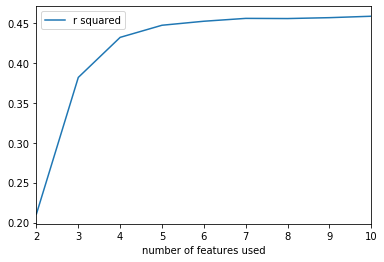

In [52]:
#for each number of feature, i have plotted the corresponding r squared for it where we can conclude that 7 features is the best
df.plot(x="number of features used", y='r squared')

## 10) choosing regularization parameter

In [53]:
#this is a list containing different values for alpha just like before
alpha_values = list(np.arange(0.1,3,0.01))

In [54]:
#this will return the cross validation score of the model created for a different alpha value on the training data scaled
mean_values = np.empty(len(alpha_values))
for i in range(0,len(alpha_values)):
    clf = linear_model.Lasso(alpha=alpha_values[i])
    clf.fit(X_train_scaler,y_train)
    mean_values[i] = np.mean(cross_val_score(clf,X_train_scaler,y_train,cv=5))

In [57]:
#in here, I have taken the maximum value of the mean values calculated in the previous cell, then the enumerate is serving as a 
#index calculation to get the index of this maximum value and returning the corresponding alpha chosen
max_value = max(mean_values)
index = 0
for i,j in enumerate(mean_values):
    if j == max_value:
        index = i

alpha_chosen = alpha_values[index]

In [58]:
#creating a classifier based on the alpha that i chose
clf = linear_model.Lasso(alpha = alpha_chosen)

In [59]:
clf.fit(X_train_scaler,y_train)

Lasso(alpha=2.019999999999999, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
prediction_for_training = clf.predict(X_train_scaler)
prediction_for_testing = clf.predict(X_test_scaler)

In [61]:
r2_score_for_scaler_training = r2_score(y_train,prediction_for_training)
r2_score_for_scaler_testing = r2_score(y_test,prediction_for_testing)

In [62]:
features_used = []
for i in range(0,len(clf.coef_)):
    if clf.coef_[i] != 0:
        features_used.append(features[i])

In [63]:
print("the alpha chosen is:",alpha_chosen)
print("the number of features used is:",len(features_used))
print("the features used in order to predict this dataset are:",features_used)
print("the r squared for the training set is:",r2_score_for_scaler_training)
print("the r squared for the training set is:",r2_score_for_scaler_testing)

the alpha chosen is: 2.019999999999999
the number of features used is: 7
the features used in order to predict this dataset are: ['SEX', 'BMI', 'BP', 'S1', 'S3', 'S5', 'S6']
the r squared for the training set is: 0.5210279848784138
the r squared for the training set is: 0.45462092735500503


## 11 a) splitting the training set  

In [64]:
#splitting the data into training and testing but taking only 99 test size
X_train_proper_set, X_calibration_set, y_train_proper_set, y_calibration = train_test_split(X_train, y_train, test_size=99, random_state=408)

## 11 b) preprocessing into StandardScaler

In [65]:
#scaling the data based on the training set
scaler = StandardScaler().fit(X_train_proper_set)
X_train_scaler = scaler.transform(X_train_proper_set)
X_calibration_scaler = scaler.transform(X_calibration_set)
X_test_scaler = scaler.transform(X_test)

In [66]:
clf.fit(X_train_scaler,y_train_proper_set)

Lasso(alpha=2.019999999999999, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## 11 c) non-conformity 

In [67]:
#first I have calculated the absolute value of the (y_true - y-calculated) where the y_calculated is using the calibration scaler
#data set for predicting. the, I have sorted the data afterwards
prediction_values = abs(y_calibration - clf.predict(X_calibration_scaler))
prediction_values = np.sort(prediction_values)

#for 5% and 20% significance, I have taken the value of the index 94 and the index 79 ( because its 99 - 5 and 99 - 20)
value_for_5_percent = prediction_values[len(X_calibration_set) - 5]
value_for_20_percent = prediction_values[len(X_calibration_set) - 20]

#this is creating an empty numpy array for the 5% and 20% to be used later
prediction_for_5 = np.empty(shape=(len(X_test_scaler),2))
prediction_for_20 = np.empty(shape=(len(X_test_scaler),2))

#in here, I am getting an interval of data for 5% and 20% 
for i in range(len(X_test_scaler)):
    pre_5 = clf.predict(X_test_scaler)[i] - value_for_5_percent
    post_5 = clf.predict(X_test_scaler)[i] + value_for_5_percent
    pre_20 = clf.predict(X_test_scaler)[i] - value_for_20_percent
    post_20 = clf.predict(X_test_scaler)[i] + value_for_20_percent
    prediction_for_5[i] = [pre_5,post_5]
    prediction_for_20[i] = [pre_20,post_20]

In [68]:
#basically, the length can be calculated using value*2 or just minimizing the post and pre of each significance
print("length for 5% is:",value_for_5_percent*2)
print("length for 20% is:",value_for_20_percent*2)

length for 5% is: 219.41058852261847
length for 20% is: 144.75706562014716


In [69]:
#I have used the test error rate initialized previously to calculate this
error_5 = test_error_rate(y_test,prediction_for_5)
error_20 = test_error_rate(y_test,prediction_for_20)

In [70]:
print("the test error rate for the 5% significance is:",error_5)
print("the test error rate for the 20% significance is:",error_20)

the test error rate for the 5% significance is: 0.06306306306306306
the test error rate for the 20% significance is: 0.22522522522522523


# all values

all values has been giving in this jupyter notebook in details and in this section I will present all the values in a more clean and visible way

3) 
- training r squared: 0.36859375515801496
- testing r squared : 0.3403312415954568
- the number of features used is: 3
- the features used: ('bmi','bp','s5')

6)
- training r squared: 0.5219263505249627
- testing r squared: 0.4364337921284196
- the number of features used is: 8
- the features used:('sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6')

8)
- training r squared: 0.5253295326189974
- testing r squared: 0.45579992198161157
- the number of features used is: 7
- the features used: ('sex', 'bmi', 'bp', 's1', 's3', 's5', 's6')

10)
- the alpha chosen is: 2.019999999999999
- training r squared: 0.5210279848784138
- testing r squared: 0.45462092735500503
- the number of features used is: 7
- the features used: ('SEX', 'BMI', 'BP', 'S1', 'S3', 'S5', 'S6')

11)
- length for 5% is: 219.41058852261847
- length for 20% is: 144.75706562014716
- the test error rate for the 5%: 0.06306306306306306
- the test error rate for the 20%: 0.22522522522522523